# Group2


## Members: Lin Yiheng/Tan Qi Sheng

## Data Set: Horror Movie
### link https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-dataset

## Problem Statement: To predict Revenue using the selected five regressors: budget, popularity, vote_count, vote_average, and runtime.

   ##   Our Code follows this Order:

   ##   We begin by cleaning the dataset, removing rows with missing or erroneous values (e.g., zero runtime). In the Exploratory Data Analysis (EDA) phase, we analyze predictor distributions with box plots, violin plots, histograms, and KDE plots, and use strip plots to observe the distribution of revenue across predictors.

   ##   For model implementation, we use four models: Decision Tree Regression for continuous predictions, Decision Tree Classification for revenue categorization (e.g., low, medium, high), Random Forest Regression for robust continuous predictions, and Random Forest Classification for accurate revenue categorization. Each model includes two interactive functions: one lets the user set and compare the model's max depth and overfitting indicators, while the other accepts predictor inputs and generates predictions using the optimal model.

In [119]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
sns.set()
moviesdata = pd.read_csv('horror_movies.csv')
moviesdata.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161.0,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,27/07/2022,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902.0,6.9,4.464364e+07,1.220643e+08,99.0,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741.0,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,11/08/2022,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584.0,7.1,2.261345e+07,5.687314e+07,93.0,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598.0,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",23/09/2022,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114.0,6.8,2.200639e+07,4.883740e+07,115.0,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999.0,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,22/06/2022,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736.0,7.9,1.968754e+07,4.773691e+07,103.0,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450.0,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,7/09/2022,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83.0,7.0,3.742998e+06,2.249196e+07,0.0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


## Dataset cleansing and individual plotting



budget statistics:
count    1.789300e+04
mean     7.356768e+06
std      2.049505e+06
min      1.031234e+06
25%      6.341952e+06
50%      7.396895e+06
75%      8.483085e+06
max      1.459162e+07
Name: budget, dtype: float64


<ipython-input-120-221b930be50b>:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(moviesdata[predictor], shade=True)


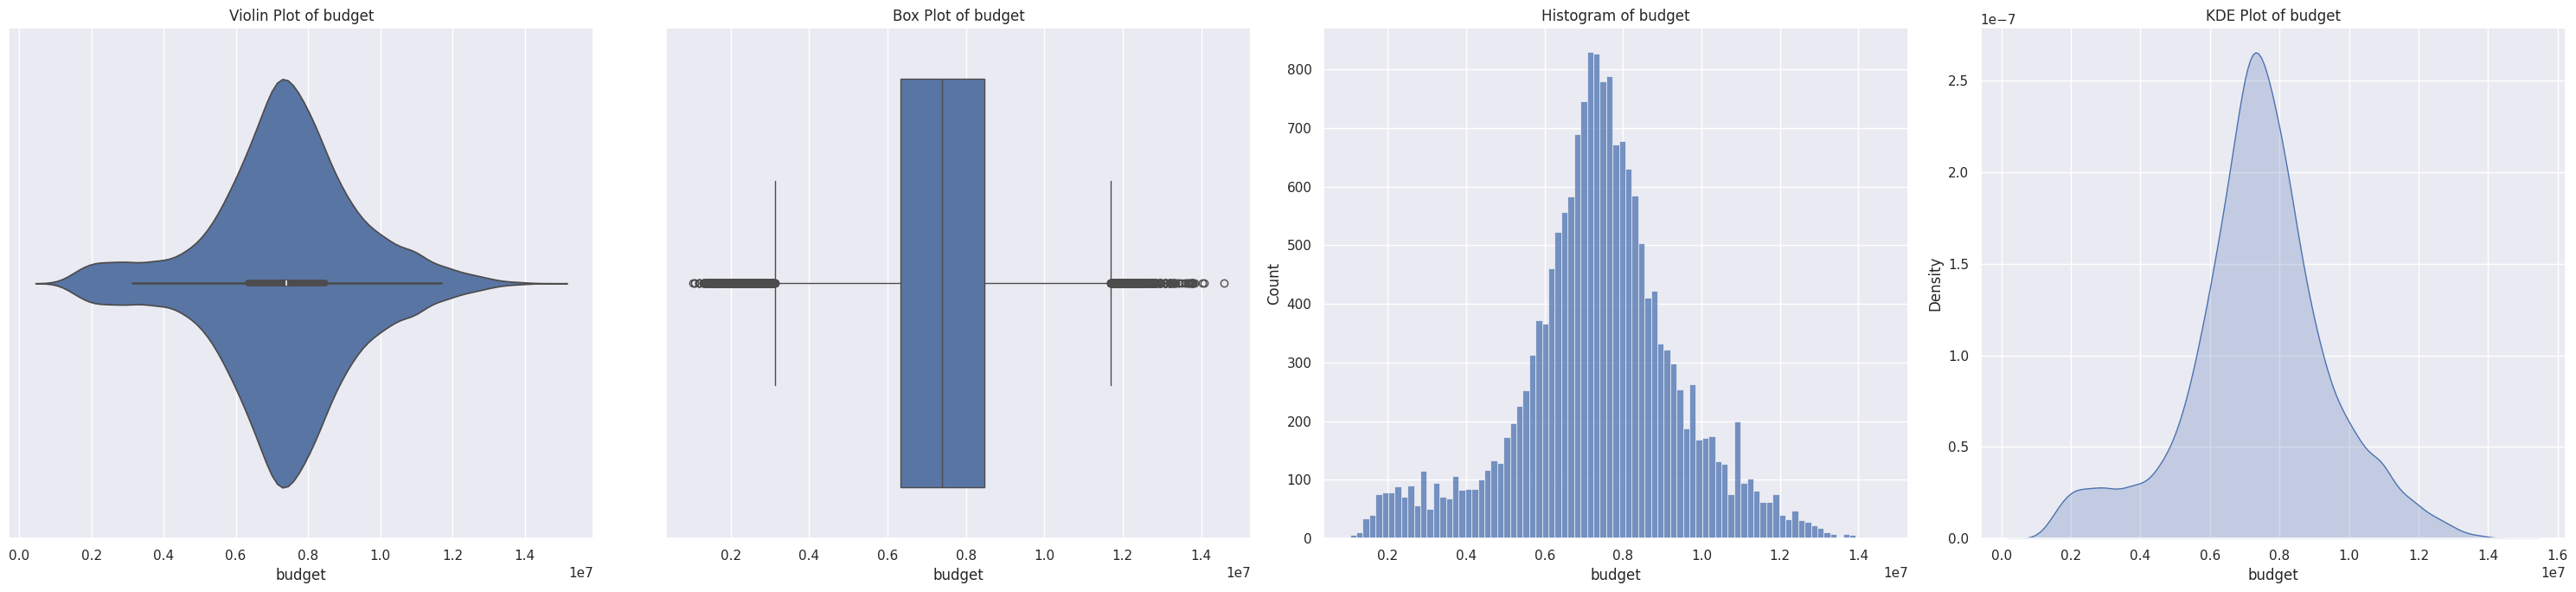


popularity statistics:
count    17893.000000
mean         3.686796
std          8.085777
min          0.600000
25%          0.884000
50%          1.674000
75%          3.666000
max        270.269000
Name: popularity, dtype: float64


<ipython-input-120-221b930be50b>:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(moviesdata[predictor], shade=True)


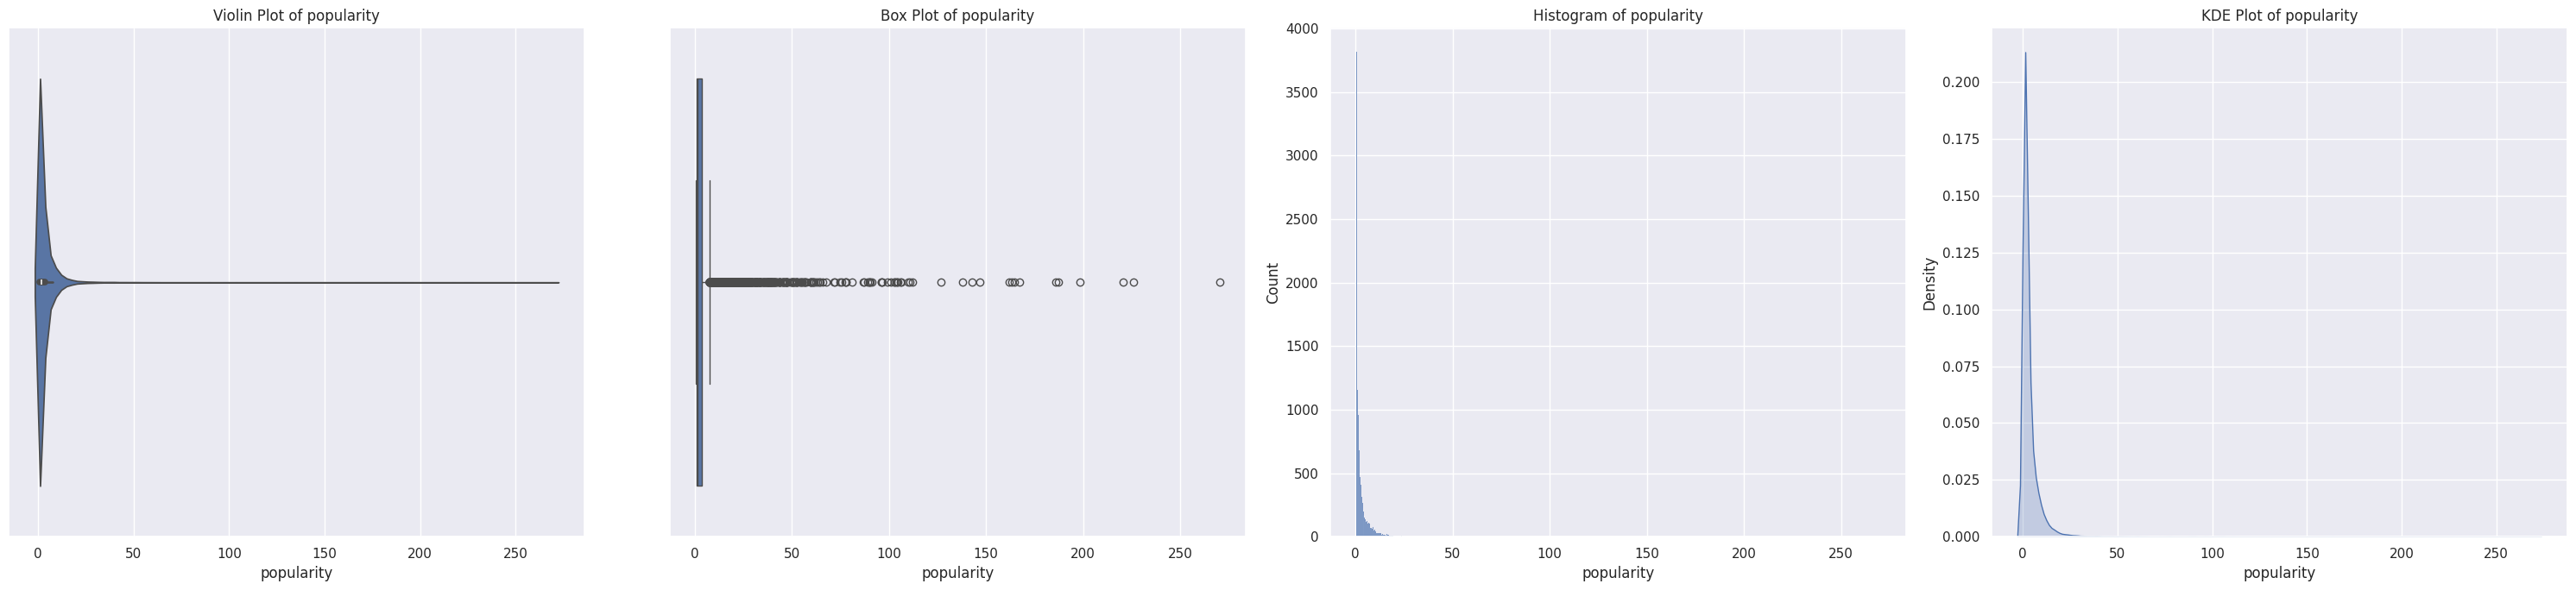


vote_count statistics:
count    17893.000000
mean        33.689376
std         79.861592
min          0.000000
25%          2.000000
50%          6.000000
75%         24.000000
max        809.000000
Name: vote_count, dtype: float64


<ipython-input-120-221b930be50b>:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(moviesdata[predictor], shade=True)


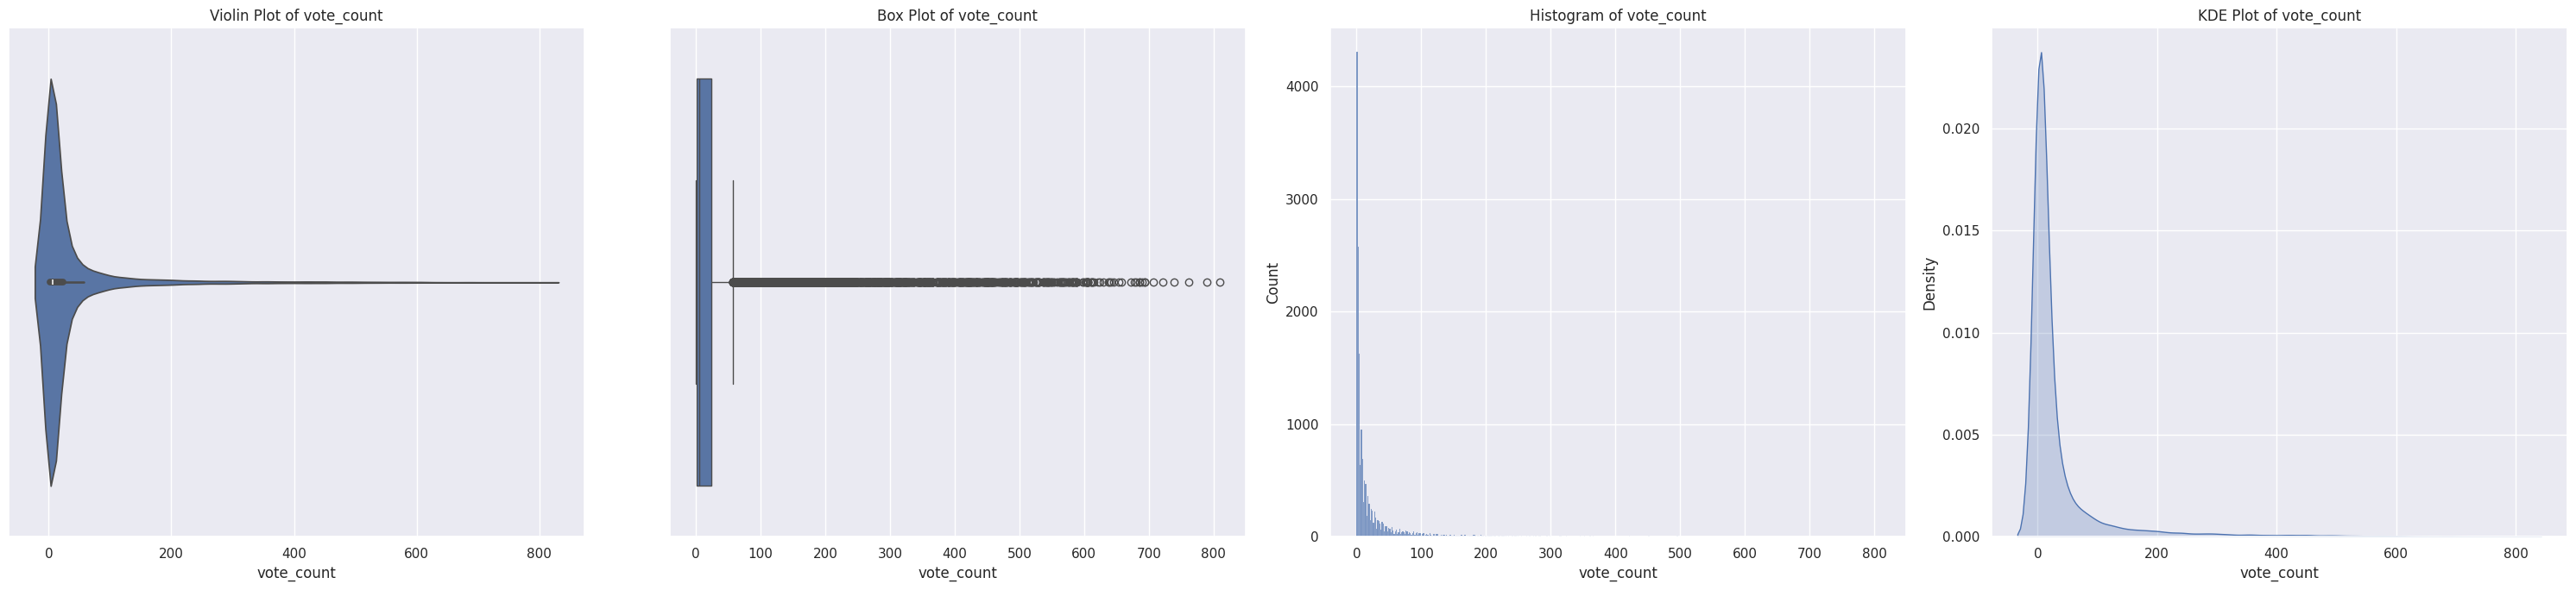


vote_average statistics:
count    17893.000000
mean         4.310932
std          2.137697
min          0.000000
25%          3.300000
50%          4.800000
75%          5.800000
max         10.000000
Name: vote_average, dtype: float64


<ipython-input-120-221b930be50b>:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(moviesdata[predictor], shade=True)


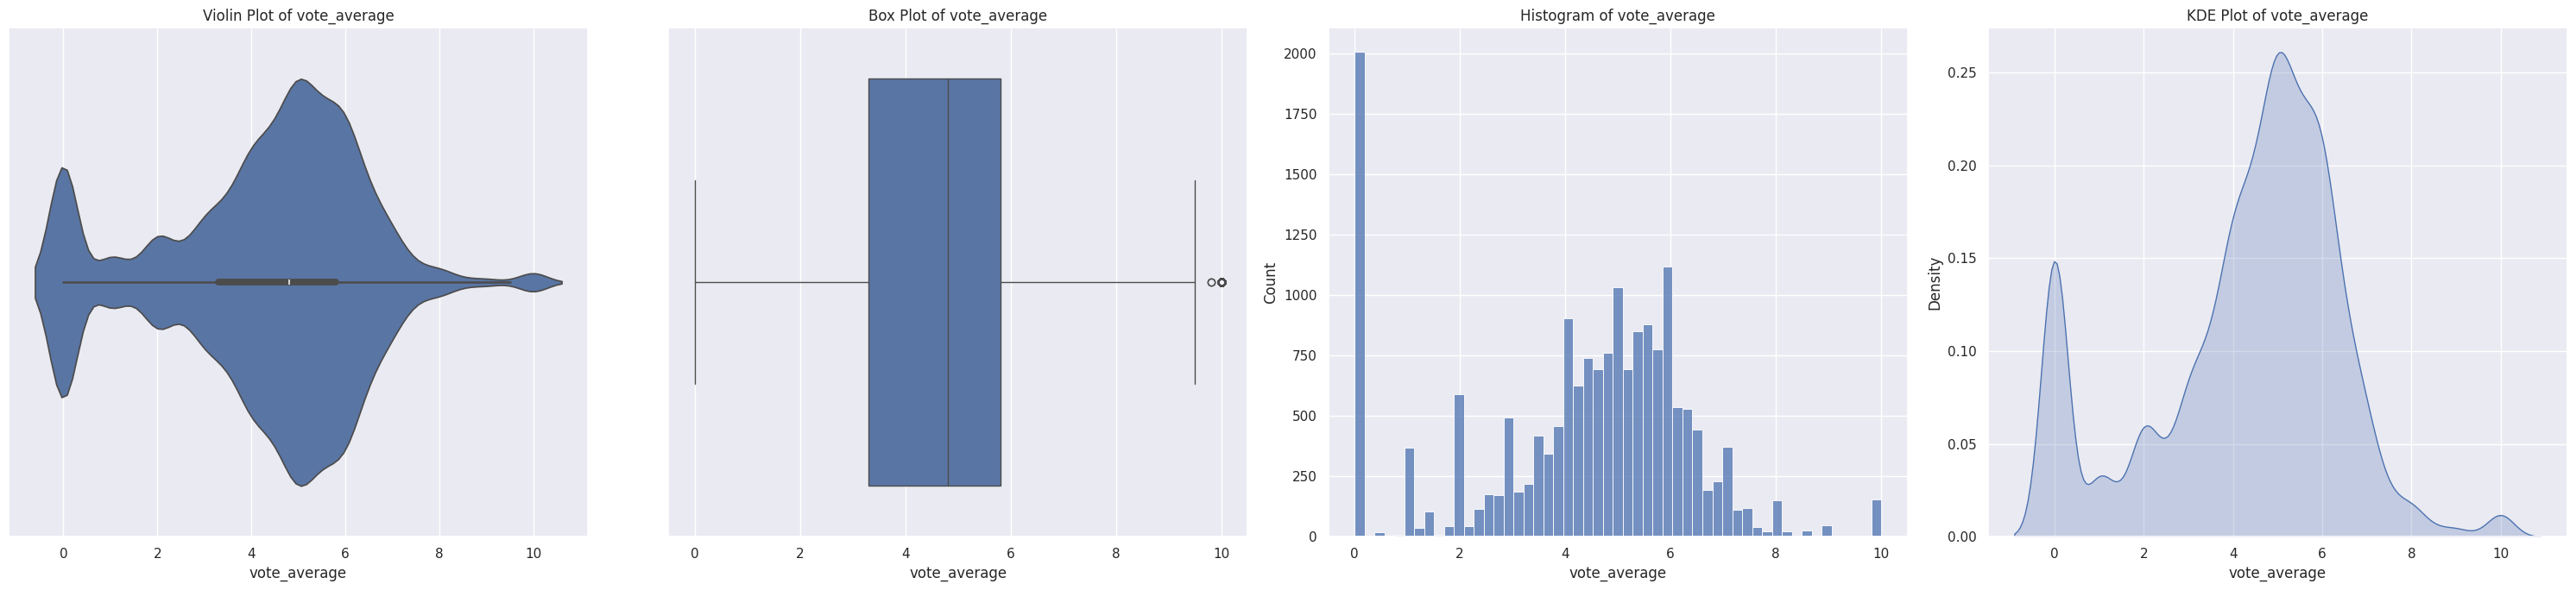


runtime statistics:
count    17893.000000
mean        85.305538
std         20.757334
min          1.000000
25%         80.000000
50%         88.000000
75%         95.000000
max        180.000000
Name: runtime, dtype: float64


<ipython-input-120-221b930be50b>:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(moviesdata[predictor], shade=True)


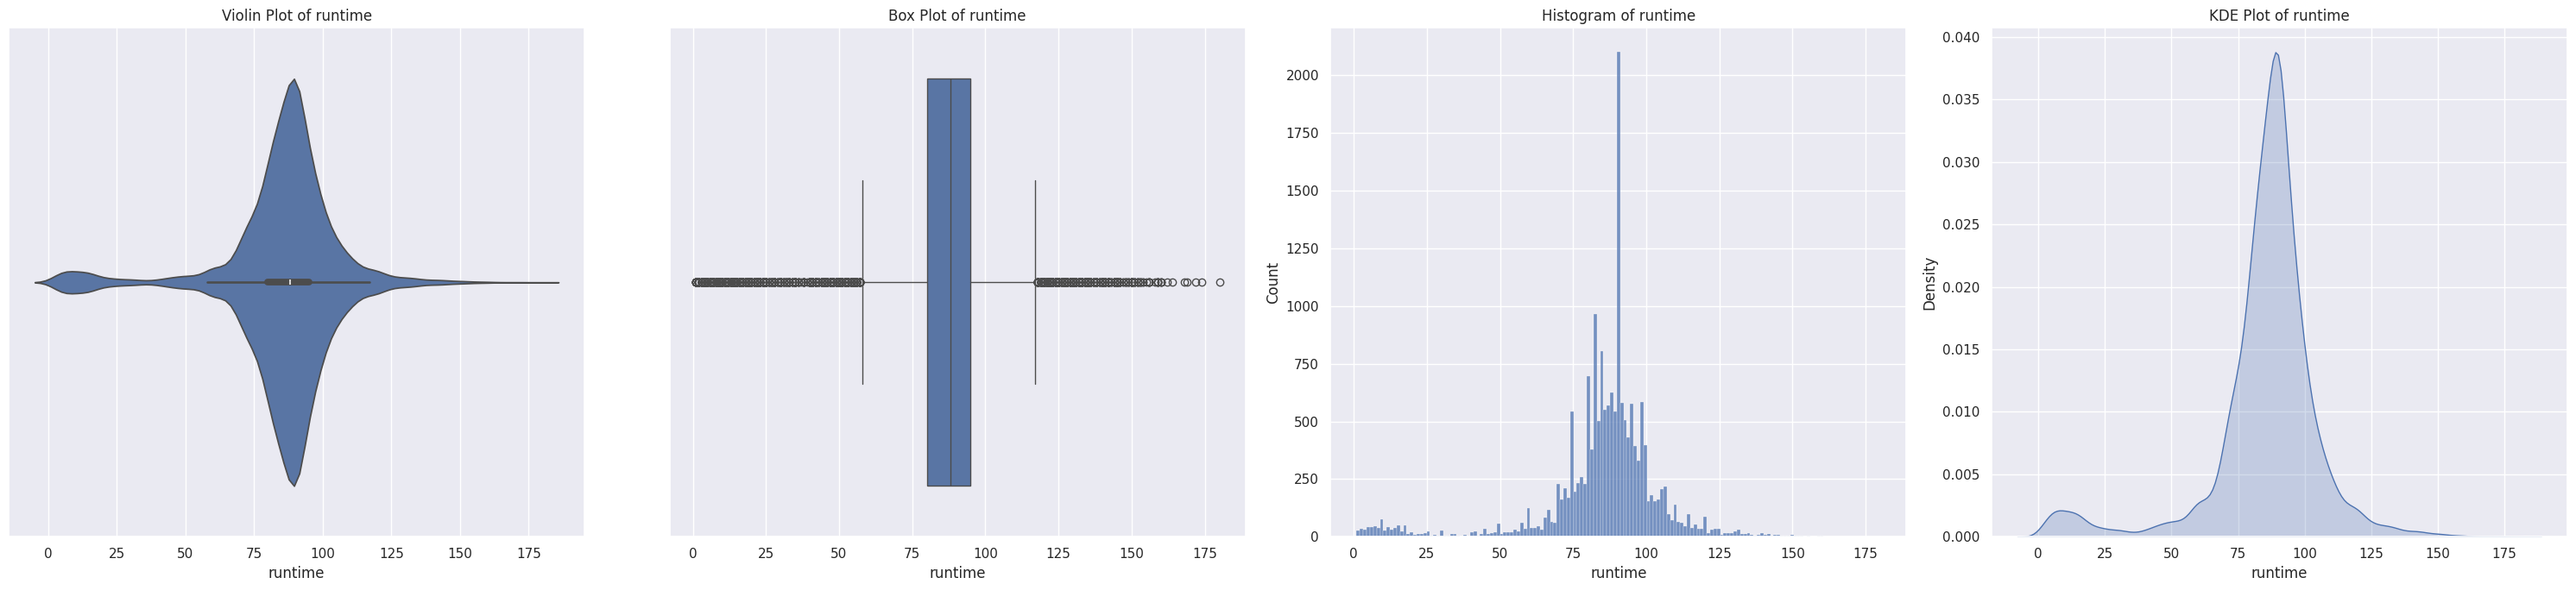

In [120]:
# Remove rows that satisfy any of the following conditions:
# 1. runtime = 0
# 2. budget = 0
# 3. popularity = 0.6, vote_count = 0, and vote_average = 0 (all three conditions must be met simultaneously)

moviesdata = moviesdata[
    ~((moviesdata['runtime'] == 0) |
      (moviesdata['budget'] == 0) |
      ((moviesdata['popularity'] == 0.6) &
       (moviesdata['vote_count'] == 0) &
       (moviesdata['vote_average'] == 0)))
]

# Calculate the IQR for 'revenue' to remove outliers
Q1 = moviesdata['revenue'].quantile(0.25)
Q3 = moviesdata['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where 'revenue' is outside the 1.5 * IQR range
moviesdata = moviesdata[
    (moviesdata['revenue'] >= Q1 - 1.5 * IQR) &
    (moviesdata['revenue'] <= Q3 + 1.5 * IQR)
]

# List of predictors to plot
predictors = ['budget', 'popularity', 'vote_count', 'vote_average', 'runtime']

# Plotting Violin Plot, Box Plot, Histogram, and KDE Plot for each predictor
for predictor in predictors:
    print(f"\n{predictor} statistics:")
    print(moviesdata[predictor].describe())
    plt.figure(figsize=(30, 7))

    # Violin Plot with horizontal orientation
    plt.subplot(1, 4, 1)
    sns.violinplot(x=moviesdata[predictor], orient='h')
    plt.title(f'Violin Plot of {predictor}')

    # Box Plot with horizontal orientation
    plt.subplot(1, 4, 2)
    sns.boxplot(x=moviesdata[predictor], orient='h')
    plt.title(f'Box Plot of {predictor}')

    # Histogram with horizontal orientation
    plt.subplot(1, 4, 3)
    sns.histplot(moviesdata[predictor], kde=False)
    plt.title(f'Histogram of {predictor}')

    # KDE Plot with horizontal orientation
    plt.subplot(1, 4, 4)
    sns.kdeplot(moviesdata[predictor], shade=True)
    plt.title(f'KDE Plot of {predictor}')

    plt.tight_layout()
    plt.show()


## Stripplot of predictors and revenue (combined)

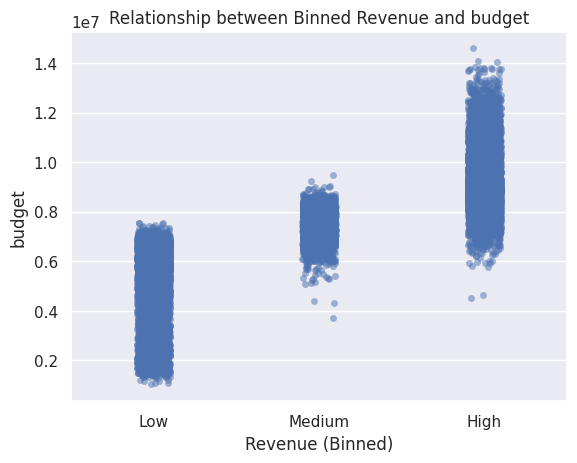

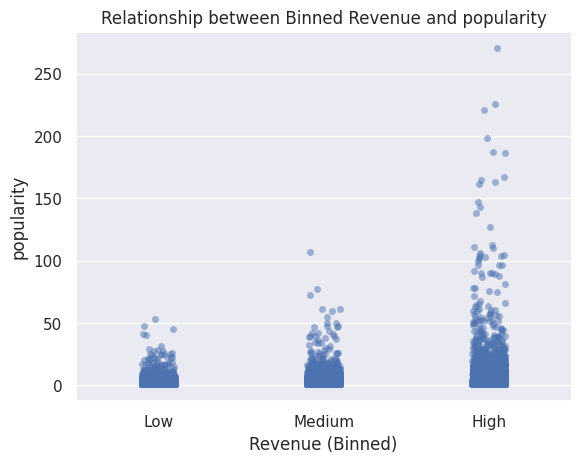

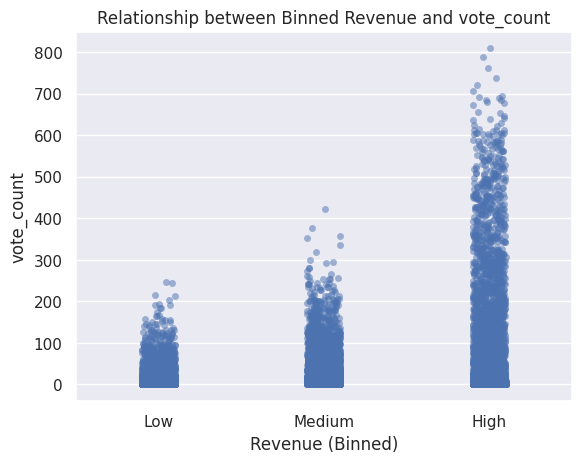

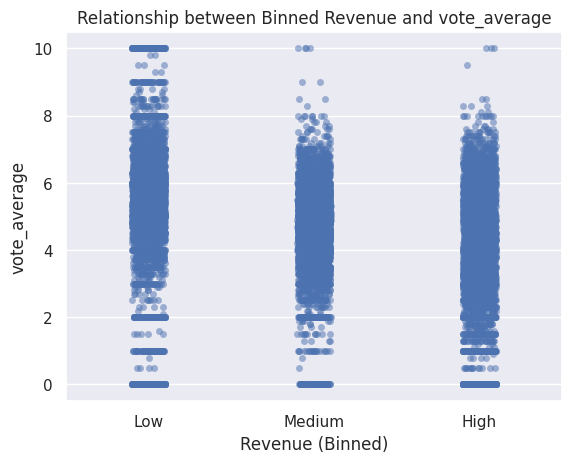

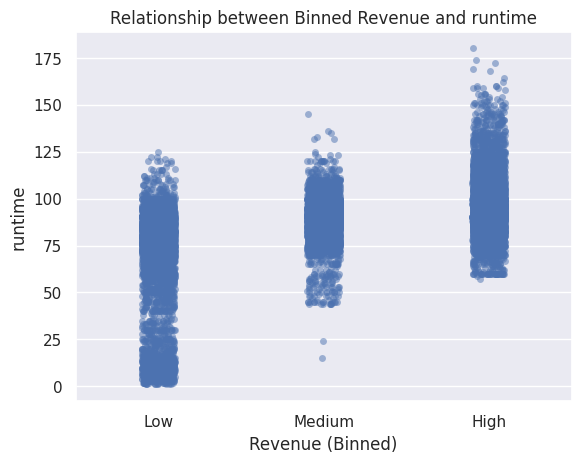

In [155]:
# Bin revenue into Low, Medium, High categories.
moviesdata['revenue_binned'] = pd.qcut(moviesdata['revenue'], q=3, labels=['Low', 'Medium', 'High'])

# Visualize the relationship between binned revenue and each predictor.
for predictor in predictors:
    sns.stripplot(x=moviesdata['revenue_binned'], y=moviesdata[predictor], alpha=0.5)
    plt.title(f'Relationship between Binned Revenue and {predictor}')
    plt.xlabel("Revenue (Binned)")
    plt.ylabel(predictor)
    plt.show()

## We now proceed to implement four models for predicting Revenue: (a) Decision Tree Regression, predicting Revenue as a continuous value; (b) Random Forest Regression, an ensemble regression approach for robust continuous Revenue predictions; (c) Decision Tree Classification, binning Revenue into categories (e.g., low, medium, high) for categorical prediction; and (d) Random Forest Classification, classifying Revenue into categories with ensemble stability. These models provide both precise and categorical insights into Revenue predictions.


## (a) Decision Tree Regression, predicting Revenue as a continuous value

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Define features and target variable
X = moviesdata[['budget', 'popularity', 'vote_count', 'vote_average', 'runtime']]
y = moviesdata['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

## Function to let user customise the maximum depth and check for overfitting for it

In [123]:
def set_max_depth():
    while True:
        try:
            max_depth = int(input("Enter the maximum depth for the Decision Tree Regressor (1-5) or '0' to exit: "))
            if max_depth == 0:
                print("Exiting...")
                return None
            elif max_depth < 1 or max_depth > 5:
                print("Please enter a depth between 1 and 5.")
                continue

            # Train the model with the chosen max depth
            tree_regressor.set_params(max_depth=max_depth)
            tree_regressor.fit(X_train, y_train)

            # Calculate MSE and R-squared for both train and test sets
            train_mse = mean_squared_error(y_train, tree_regressor.predict(X_train))
            test_mse = mean_squared_error(y_test, tree_regressor.predict(X_test))
            train_r2 = r2_score(y_train, tree_regressor.predict(X_train))
            test_r2 = r2_score(y_test, tree_regressor.predict(X_test))

            # Print results for the chosen depth
            print(f"\nMax Depth: {max_depth}")
            print(f"Training Set MSE: {train_mse:.2f}, R-squared: {train_r2:.2f}")
            print(f"Test Set MSE: {test_mse:.2f}, R-squared: {test_r2:.2f}")

            # Check for overfitting
            if train_mse < test_mse and train_r2 > test_r2:
                print("Model is likely overfitting.\n")
            else:
                print("No significant overfitting detected.\n")

            # Continue asking the user for more input after processing this one
            continue

        except ValueError:
            print("Invalid input. Please enter an integer.")

# Call the function
set_max_depth()


Enter the maximum depth for the Decision Tree Regressor (1-5) or '0' to exit: 1

Max Depth: 1
Training Set MSE: 1070489864119.96, R-squared: 0.54
Test Set MSE: 1096174778178.86, R-squared: 0.53
Model is likely overfitting.

Enter the maximum depth for the Decision Tree Regressor (1-5) or '0' to exit: 0
Exiting...


## Function to Find and Use the Best Model for Revenue Prediction. This function identifies the optimal decision tree regression model by testing max depths from 1 to 5 and selecting the least overfitting model. The user can then input values for any of the five regressors; missing values are filled with dataset means. The function outputs an exact predicted Revenue value rather than a range.

In [124]:
def predict_revenue():
    print("\nEvaluating MSE and R-squared for depths 1 to 5 to find the least overfitting depth...")

    # Initialize variables to store the best depth and associated metrics
    best_depth = None
    lowest_overfitting_score = float('inf')

    # Loop through max depths from 1 to 5 to find the least overfitting depth
    for depth in range(1, 6):
        # Train the model with the current depth
        tree_regressor.set_params(max_depth=depth)
        tree_regressor.fit(X_train, y_train)

        # Calculate MSE and R-squared for both train and test sets
        train_mse = mean_squared_error(y_train, tree_regressor.predict(X_train))
        test_mse = mean_squared_error(y_test, tree_regressor.predict(X_test))
        train_r2 = r2_score(y_train, tree_regressor.predict(X_train))
        test_r2 = r2_score(y_test, tree_regressor.predict(X_test))

        # Calculate an overfitting score as the difference between train and test MSE
        overfitting_score = abs(train_mse - test_mse)

        # Print results for the current depth
        print(f"\nMax Depth: {depth}")
        print(f"Training Set MSE: {train_mse:.2f}, R-squared: {train_r2:.2f}")
        print(f"Test Set MSE: {test_mse:.2f}, R-squared: {test_r2:.2f}")
        print(f"Overfitting Score (Train-Test MSE Difference): {overfitting_score:.2f}")

        # Update the best depth if this one has the least overfitting
        if overfitting_score < lowest_overfitting_score:
            lowest_overfitting_score = overfitting_score
            best_depth = depth

    print(f"\nChosen Optimal Max Depth for Prediction: {best_depth} (Least Overfitting)")

    # Set the model to the chosen optimal depth
    tree_regressor.set_params(max_depth=best_depth)
    tree_regressor.fit(X_train, y_train)

    # Loop to continuously ask for predictions
    while True:
        continue_prediction = input("\nWould you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: ").strip().upper()
        if continue_prediction == 'N':
            print("Exiting prediction loop.")
            break
        elif continue_prediction != 'Y':
            print("Invalid input. Please enter 'Y' or 'N'.")
            continue

        # Prompt user for feature values, with means as default if left blank
        print(f"\nUsing max depth = {best_depth} for prediction based on least overfitting.")
        print("Enter values for each feature to predict revenue (leave blank to use mean values):")
        budget = input("Budget (or press Enter to use mean): ")
        popularity = input("Popularity (or press Enter to use mean): ")
        vote_count = input("Vote Count (or press Enter to use mean): ")
        vote_average = input("Vote Average (or press Enter to use mean): ")
        runtime = input("Runtime (or press Enter to use mean): ")

        # Fill in missing values with the mean of the respective columns
        data = [
            float(budget) if budget else X['budget'].mean(),
            float(popularity) if popularity else X['popularity'].mean(),
            int(vote_count) if vote_count else int(X['vote_count'].mean()),
            float(vote_average) if vote_average else X['vote_average'].mean(),
            int(runtime) if runtime else int(X['runtime'].mean())
        ]

        # Predict revenue using the trained model
        predicted_revenue = tree_regressor.predict([data])[0]
        print("\nPrediction completed with the following parameters:")
        print(f"Budget: {data[0]}, Popularity: {data[1]}, Vote Count: {data[2]}, Vote Average: {data[3]}, Runtime: {data[4]}")
        print(f"\nPredicted Revenue with optimal max depth = {best_depth}: ${predicted_revenue:.2f}")

# Call the function to start prediction
predict_revenue()




Evaluating MSE and R-squared for depths 1 to 5 to find the least overfitting depth...

Max Depth: 1
Training Set MSE: 1070489864119.96, R-squared: 0.54
Test Set MSE: 1096174778178.86, R-squared: 0.53
Overfitting Score (Train-Test MSE Difference): 25684914058.90

Max Depth: 2
Training Set MSE: 451892591398.79, R-squared: 0.81
Test Set MSE: 455241549568.90, R-squared: 0.80
Overfitting Score (Train-Test MSE Difference): 3348958170.11

Max Depth: 3
Training Set MSE: 245882565921.97, R-squared: 0.89
Test Set MSE: 257513651551.45, R-squared: 0.89
Overfitting Score (Train-Test MSE Difference): 11631085629.49

Max Depth: 4
Training Set MSE: 136967944310.99, R-squared: 0.94
Test Set MSE: 152540329336.53, R-squared: 0.93
Overfitting Score (Train-Test MSE Difference): 15572385025.54

Max Depth: 5
Training Set MSE: 86216683618.14, R-squared: 0.96
Test Set MSE: 101056898711.87, R-squared: 0.96
Overfitting Score (Train-Test MSE Difference): 14840215093.73

Chosen Optimal Max Depth for Prediction: 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(



Prediction completed with the following parameters:
Budget: 7356768.299615156, Popularity: 3.6867958978371433, Vote Count: 33, Vote Average: 4.310931649248309, Runtime: 85

Predicted Revenue with optimal max depth = 2: $8337906.69

Would you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: N
Exiting prediction loop.


## (b) Random Forest Regression, predicting Revenue as a continuous value

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
X = moviesdata[['budget', 'popularity', 'vote_count', 'vote_average', 'runtime']]
y = moviesdata['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with n_estimators fixed at 50
forest_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

## Function to let user customise the maximum depth and check for overfitting for it

In [ ]:
# Define features and target variable
X = moviesdata[['budget', 'popularity', 'vote_count', 'vote_average', 'runtime']]
y = moviesdata['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with n_estimators fixed at 50
forest_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

# Function to set max_depth and evaluate the model with MSE and R-squared
def set_max_depth():
    while True:
        try:
            max_depth = int(input("Enter the maximum depth for the Random Forest Regressor (choose between 1 and 5, or enter '0' to exit): "))
            if max_depth == 0:
                print("Exiting...")
                return None
            elif max_depth < 1 or max_depth > 5:
                print("Please enter a depth between 1 and 5.")
                continue

            # Train the model with the chosen max depth
            forest_regressor.set_params(max_depth=max_depth)
            forest_regressor.fit(X_train, y_train)

            # Calculate MSE and R-squared for both train and test sets
            train_mse = mean_squared_error(y_train, forest_regressor.predict(X_train))
            test_mse = mean_squared_error(y_test, forest_regressor.predict(X_test))
            train_r2 = r2_score(y_train, forest_regressor.predict(X_train))
            test_r2 = r2_score(y_test, forest_regressor.predict(X_test))

            # Print results for the chosen max_depth
            print(f"\nMax Depth: {max_depth}")
            print(f"Training Set MSE: {train_mse:.2f}, R-squared: {train_r2:.2f}")
            print(f"Test Set MSE: {test_mse:.2f}, R-squared: {test_r2:.2f}")

            # Check for overfitting
            if train_mse < test_mse and train_r2 > test_r2:
                print("Model is likely overfitting.\n")
            else:
                print("No significant overfitting detected.\n")

            # Continue asking the user for more input after processing this one
            continue

        except ValueError:
            print("Invalid input. Please enter an integer.")

# Call the function
set_max_depth()


## Function to Find and Use the Best Model for Revenue Prediction.

In [56]:
# Function to predict revenue based on the best max_depth found
def predict_revenue():
    print("\nEvaluating MSE and R-squared for max_depth (1 to 5) to find the least overfitting configuration...")

    # Initialize variables to store the best max_depth and associated metrics
    best_max_depth = None
    lowest_overfitting_score = float('inf')

    # Loop through max_depth values (1 to 5) to find the least overfitting configuration
    for max_depth in range(1, 6):
        # Train the model with the current max_depth
        forest_regressor.set_params(max_depth=max_depth)
        forest_regressor.fit(X_train, y_train)

        # Calculate MSE and R-squared for both train and test sets
        train_mse = mean_squared_error(y_train, forest_regressor.predict(X_train))
        test_mse = mean_squared_error(y_test, forest_regressor.predict(X_test))
        train_r2 = r2_score(y_train, forest_regressor.predict(X_train))
        test_r2 = r2_score(y_test, forest_regressor.predict(X_test))

        # Calculate an overfitting score as the difference between train and test MSE
        overfitting_score = abs(train_mse - test_mse)

        # Print results for the current max_depth
        print(f"\nMax Depth: {max_depth}")
        print(f"Training Set MSE: {train_mse:.2f}, R-squared: {train_r2:.2f}")
        print(f"Test Set MSE: {test_mse:.2f}, R-squared: {test_r2:.2f}")
        print(f"Overfitting Score (Train-Test MSE Difference): {overfitting_score:.2f}")

        # Update the best max_depth if this one has the least overfitting
        if overfitting_score < lowest_overfitting_score:
            lowest_overfitting_score = overfitting_score
            best_max_depth = max_depth

    print(f"\nChosen Optimal Max Depth for Prediction: {best_max_depth} (Least Overfitting)")

    # Set the model to the chosen optimal max_depth
    forest_regressor.set_params(max_depth=best_max_depth)
    forest_regressor.fit(X_train, y_train)

    # Loop to continuously ask for predictions
    while True:
        continue_prediction = input("\nWould you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: ").strip().upper()
        if continue_prediction == 'N':
            print("Exiting prediction loop.")
            break
        elif continue_prediction != 'Y':
            print("Invalid input. Please enter 'Y' or 'N'.")
            continue

        # Prompt user for feature values, with means as default if left blank
        print(f"\nUsing max depth = {best_max_depth} for prediction based on least overfitting.")
        print("Enter values for each feature to predict revenue (leave blank to use mean values):")
        budget = input("Budget (or press Enter to use mean): ")
        popularity = input("Popularity (or press Enter to use mean): ")
        vote_count = input("Vote Count (or press Enter to use mean): ")
        vote_average = input("Vote Average (or press Enter to use mean): ")
        runtime = input("Runtime (or press Enter to use mean): ")

        # Fill in missing values with the mean of the respective columns
        data = [
            float(budget) if budget else X['budget'].mean(),
            float(popularity) if popularity else X['popularity'].mean(),
            int(vote_count) if vote_count else int(X['vote_count'].mean()),
            float(vote_average) if vote_average else X['vote_average'].mean(),
            int(runtime) if runtime else int(X['runtime'].mean())
        ]

        # Predict revenue using the trained model
        predicted_revenue = forest_regressor.predict([data])[0]
        print("\nPrediction completed with the following parameters:")
        print(f"Budget: {data[0]}, Popularity: {data[1]}, Vote Count: {data[2]}, Vote Average: {data[3]}, Runtime: {data[4]}")
        print(f"\nPredicted Revenue with optimal max depth = {best_max_depth}: ${predicted_revenue:.2f}")

# Call the function to start prediction
predict_revenue()


Evaluating MSE and R-squared for max_depth (1 to 5) to find the least overfitting configuration...

Max Depth: 1
Training Set MSE: 1557350280790.12, R-squared: 0.57
Test Set MSE: 1588164132031.92, R-squared: 0.56
Overfitting Score (Train-Test MSE Difference): 30813851241.80

Max Depth: 2
Training Set MSE: 627044800438.49, R-squared: 0.83
Test Set MSE: 621008793260.37, R-squared: 0.83
Overfitting Score (Train-Test MSE Difference): 6036007178.12

Max Depth: 3
Training Set MSE: 314854574434.65, R-squared: 0.91
Test Set MSE: 303411597948.75, R-squared: 0.92
Overfitting Score (Train-Test MSE Difference): 11442976485.90

Max Depth: 4
Training Set MSE: 144453763151.93, R-squared: 0.96
Test Set MSE: 153770363637.02, R-squared: 0.96
Overfitting Score (Train-Test MSE Difference): 9316600485.10

Max Depth: 5
Training Set MSE: 78718973220.54, R-squared: 0.98
Test Set MSE: 91400425430.23, R-squared: 0.97
Overfitting Score (Train-Test MSE Difference): 12681452209.69

Chosen Optimal Max Depth for Pr

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Prediction completed with the following parameters:
Budget: 100000.0, Popularity: 1.0, Vote Count: 1, Vote Average: 1.0, Runtime: 1

Predicted Revenue with optimal max depth = 2: $3251657.56

Would you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: N
Exiting prediction loop.


## (c) Decision Tree Classifier, predicting Revenue as a discrete value

In [148]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
# Initialize the Decision Tree Classifier
# Define features and target variable
X = moviesdata[['budget', 'popularity', 'vote_count', 'vote_average', 'runtime']]
y = moviesdata['revenue_binned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)

## Function to let user customise the maximum depth and check for overfitting for it

Enter the maximum depth for the Decision Tree Classifier (1-5, or '0' to exit): 5


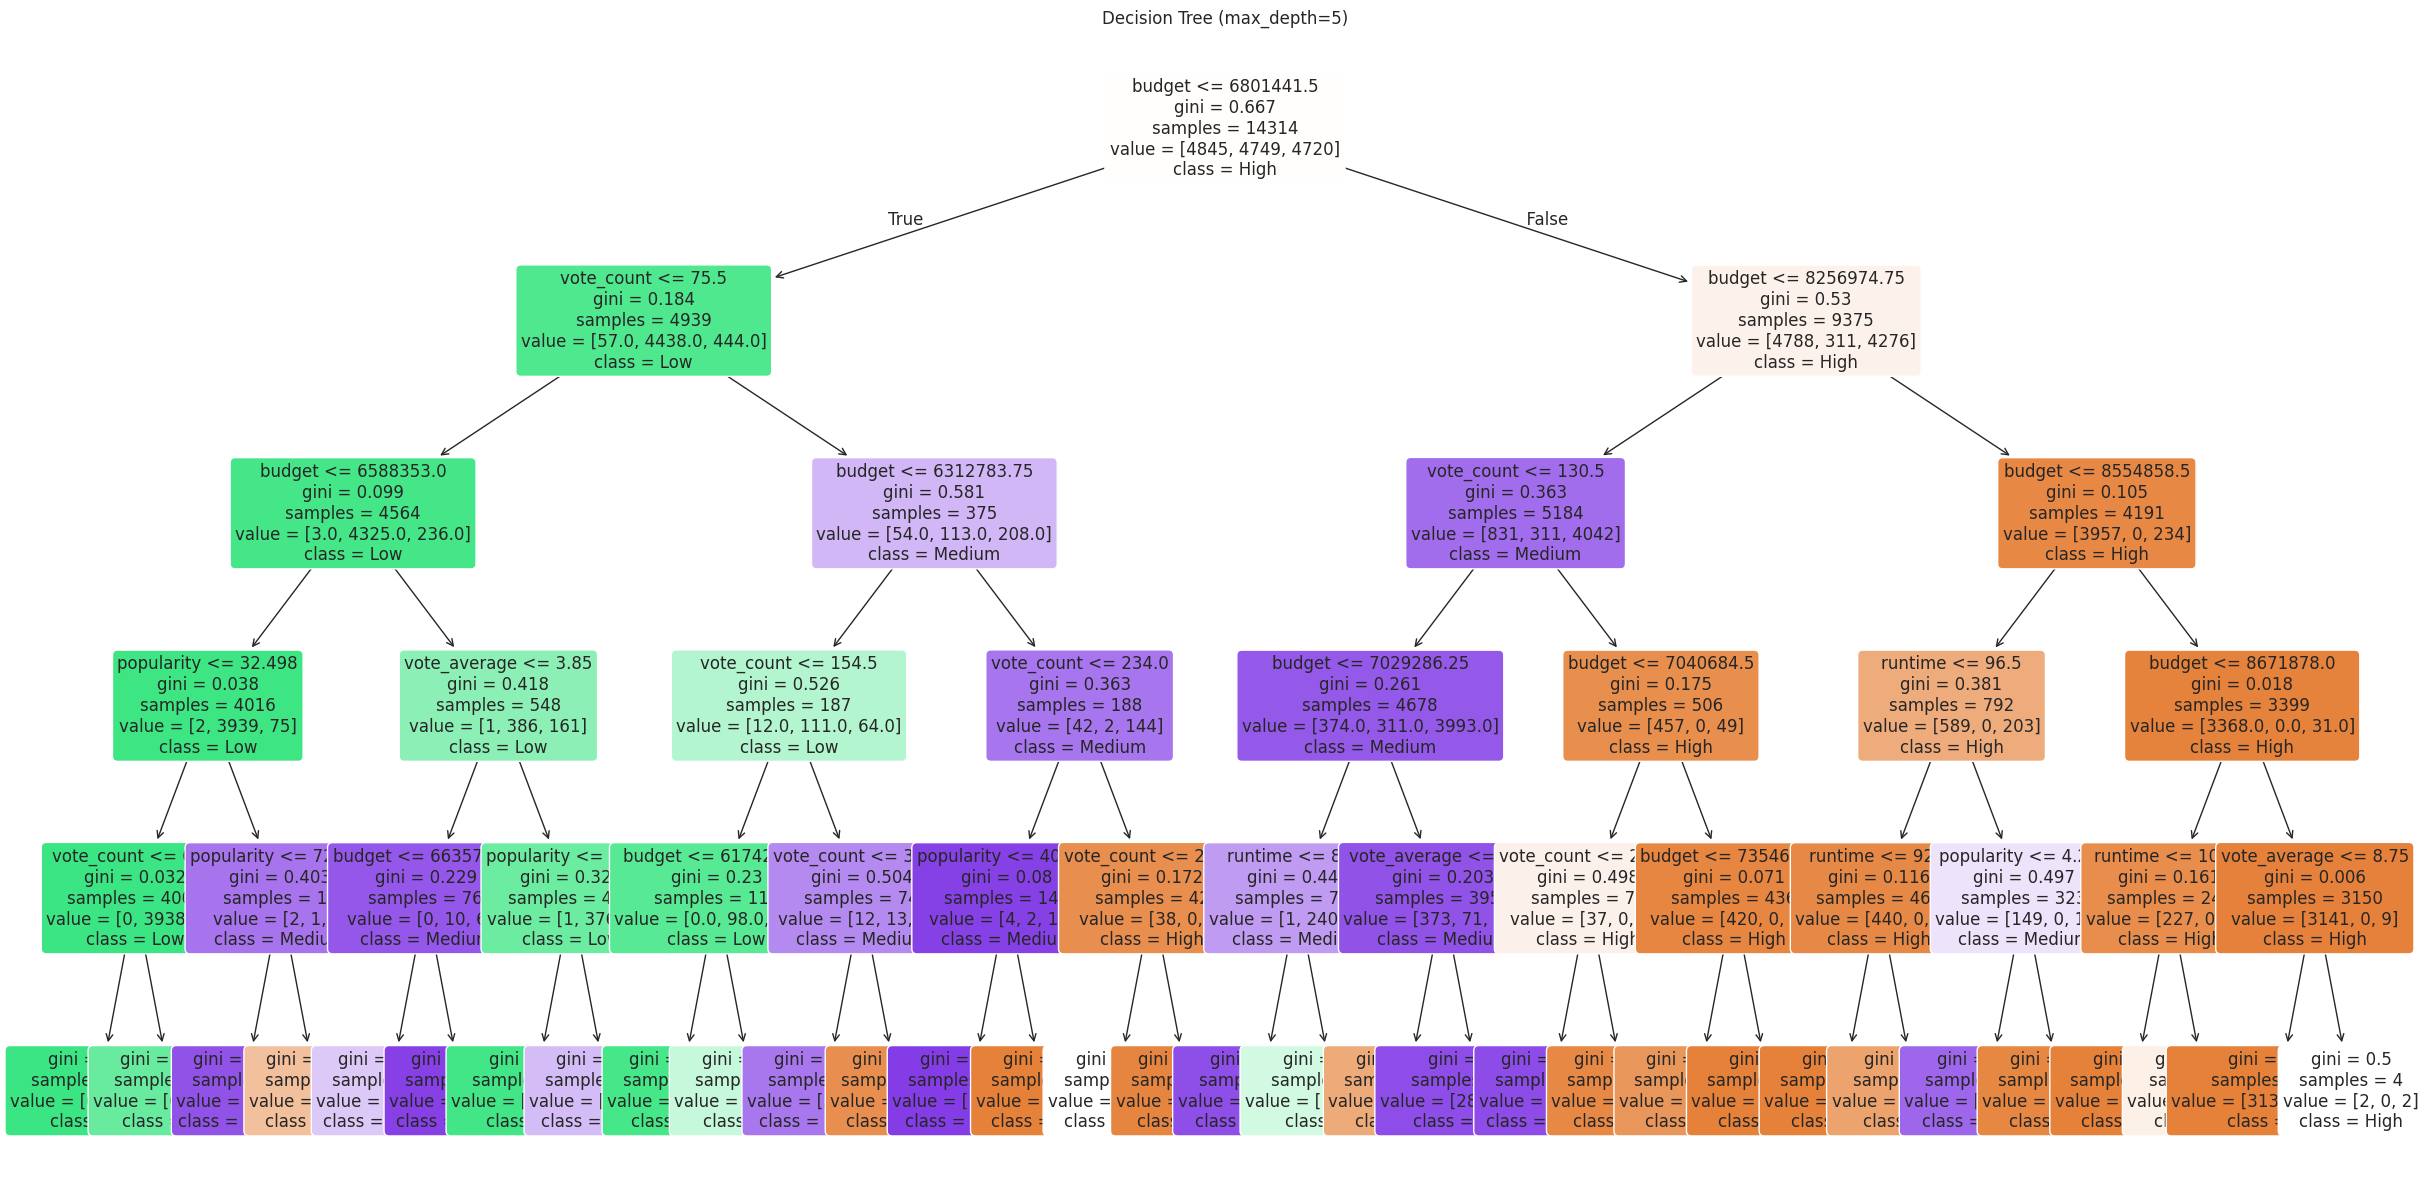


Max Depth: 5
Training Accuracy: 0.94
Test Accuracy: 0.93


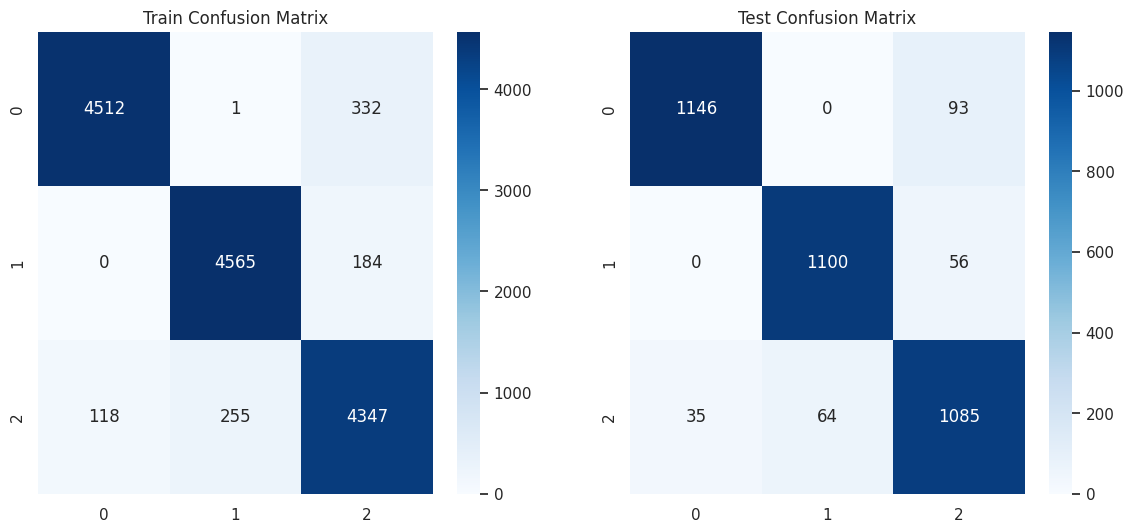

Enter the maximum depth for the Decision Tree Classifier (1-5, or '0' to exit): 0
Exiting...


In [149]:
def set_max_depth():
    while True:
        try:
            # Prompt user for max depth input
            max_depth = int(input("Enter the maximum depth for the Decision Tree Classifier (1-5, or '0' to exit): "))
        except ValueError:
            print("Invalid input. Please enter an integer.")
            continue  # Prompt the user again

        # Exit if user enters '0'
        if max_depth == 0:
            print("Exiting...")
            return None

        # Validate max_depth range
        if max_depth < 1 or max_depth > 5:
            print("Invalid input. Please enter a depth between 1 and 5.")
            continue

        try:
            # Set max_depth and train the model
            tree_classifier.set_params(max_depth=max_depth)
            tree_classifier.fit(X_train, y_train)

            # Visualize the trained decision tree with enhanced readability
            plt.figure(figsize=(30, 15))  # Increase figure size for clarity
            plot_tree(
                tree_classifier,
                feature_names=X_train.columns,
                class_names=tree_classifier.classes_,
                filled=True,
                rounded=True,
                fontsize=12  # Increase font size for readability
            )
            plt.title(f"Decision Tree (max_depth={max_depth})")
            plt.show()

            # Calculate accuracy for both train and test sets
            y_train_pred = tree_classifier.predict(X_train)
            y_test_pred = tree_classifier.predict(X_test)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Print accuracy
            print(f"\nMax Depth: {max_depth}")
            print(f"Training Accuracy: {train_accuracy:.2f}")
            print(f"Test Accuracy: {test_accuracy:.2f}")

            # Plot confusion matrix for both train and test sets
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", ax=axes[0], cmap="Blues")
            axes[0].set_title("Train Confusion Matrix")
            sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", ax=axes[1], cmap="Blues")
            axes[1].set_title("Test Confusion Matrix")
            plt.show()
        except Exception as e:
            print(f"An error occurred: {e}")
            continue  # Prompt the user again

# Call the function to set max_depth, visualize the tree, and evaluate the model
set_max_depth()


## Function to Find and Use the Best Model for Revenue Prediction.

In [150]:
# Function 2: Find the best max_depth by looping from 1 to 5, print all test accuracies, and use best depth for prediction
def predict_with_best_depth():
    print("\nEvaluating test accuracy for max_depth values from 1 to 5 to find the best configuration...")

    # Initialize variables to store the best max_depth and highest accuracy
    best_max_depth = None
    highest_accuracy = 0

    # Loop through max_depth values from 1 to 5
    for max_depth in range(1, 6):
        # Set max_depth and train the model
        tree_classifier.set_params(max_depth=max_depth)
        tree_classifier.fit(X_train, y_train)

        # Calculate accuracy for the test set
        test_accuracy = accuracy_score(y_test, tree_classifier.predict(X_test))

        # Print accuracy for the current max_depth
        print(f"Max Depth: {max_depth} | Test Set Accuracy: {test_accuracy:.2f}")

        # Update the best max_depth if this one has the highest accuracy
        if test_accuracy > highest_accuracy:
            highest_accuracy = test_accuracy
            best_max_depth = max_depth

    print(f"\nChosen Optimal Max Depth for Prediction: {best_max_depth} (Highest Test Accuracy: {highest_accuracy:.2f})")

    # Set the model to the optimal max_depth and train
    tree_classifier.set_params(max_depth=best_max_depth)
    tree_classifier.fit(X_train, y_train)

    # Continuous prediction loop until user chooses to exit
    while True:
        continue_prediction = input("\nWould you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: ").strip().upper()
        if continue_prediction == 'N':
            print("Exiting prediction loop.")
            break
        elif continue_prediction != 'Y':
            print("Invalid input. Please enter 'Y' or 'N'.")
            continue

        # Prompt user for feature values and predict the category
        print("\nUsing the best max depth for prediction based on highest accuracy.")
        print("Enter values for each feature to predict category (leave blank to use mean values):")
        data = [
            float(input(f"{feature} (or press Enter to use mean): ") or X_train[feature].mean())
            for feature in X_train.columns
        ]

        # Predict category using the trained model
        predicted_category = tree_classifier.predict([data])[0]
        print("\nPrediction completed with the following parameters:")
        print(f"Input values: {data}")
        print(f"Predicted Category with optimal max depth = {best_max_depth}: {predicted_category}")

# Call the function to evaluate all depths and predict with the best depth
predict_with_best_depth()



Evaluating test accuracy for max_depth values from 1 to 5 to find the best configuration...
Max Depth: 1 | Test Set Accuracy: 0.64
Max Depth: 2 | Test Set Accuracy: 0.87
Max Depth: 3 | Test Set Accuracy: 0.90
Max Depth: 4 | Test Set Accuracy: 0.91
Max Depth: 5 | Test Set Accuracy: 0.93

Chosen Optimal Max Depth for Prediction: 5 (Highest Test Accuracy: 0.93)

Would you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: y

Using the best max depth for prediction based on highest accuracy.
Enter values for each feature to predict category (leave blank to use mean values):
budget (or press Enter to use mean): 
popularity (or press Enter to use mean): 
vote_count (or press Enter to use mean): 
vote_average (or press Enter to use mean): 
runtime (or press Enter to use mean): 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Prediction completed with the following parameters:
Input values: [7348356.889346095, 3.669163196870197, 33.80033533603465, 4.319218946485957, 85.2810535140422]
Predicted Category with optimal max depth = 5: Medium

Would you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: n
Exiting prediction loop.


## (d) Random forest classifier, predicting Revenue as a discrete value

In [151]:
# Bin revenue into 'High', 'Medium', 'Low' categories
revenue_bins = pd.qcut(moviesdata['revenue'], q=3, labels=["Low", "Medium", "High"])
moviesdata['revenue_category'] = revenue_bins

# Define features and target variable
X = moviesdata[['budget', 'popularity', 'vote_count', 'vote_average', 'runtime']]
y = moviesdata['revenue_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
forest_classifier = RandomForestClassifier(random_state=42)


## Function to let user customise the maximum depth and check for overfitting for it

Enter the maximum depth for the Random Forest Classifier (1-5, or '0' to exit): 5


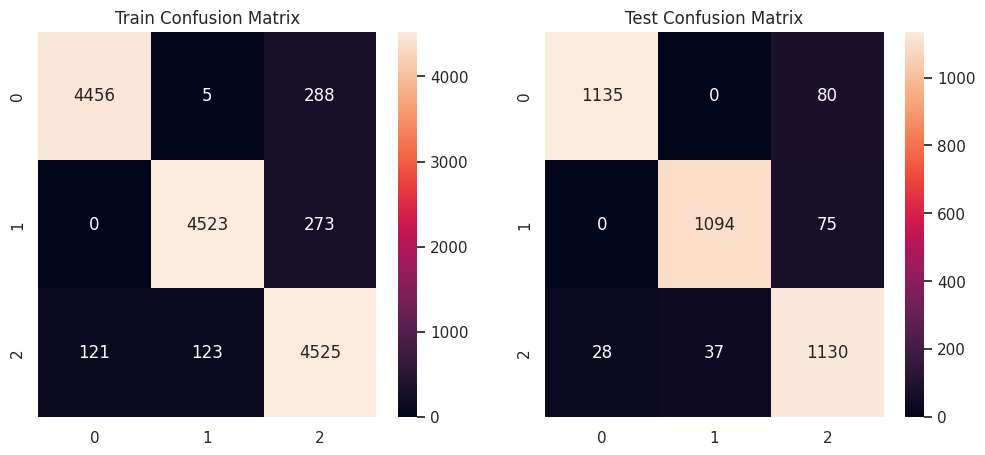


Max Depth: 5
Training Accuracy: 0.94
Test Accuracy: 0.94
Enter the maximum depth for the Random Forest Classifier (1-5, or '0' to exit): 4


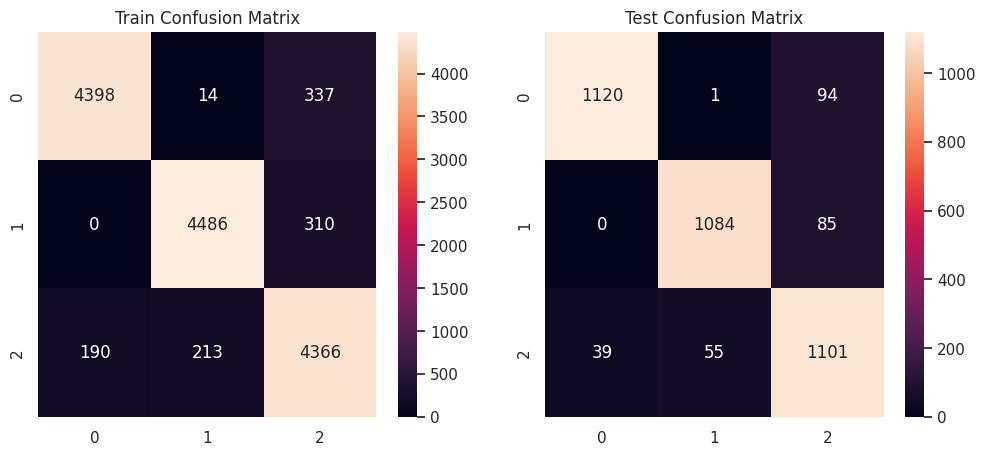


Max Depth: 4
Training Accuracy: 0.93
Test Accuracy: 0.92
Enter the maximum depth for the Random Forest Classifier (1-5, or '0' to exit): 0
Exiting...


In [153]:
# Function 1: Set max_depth and evaluate the model
def set_max_depth():
    while True:
        try:
            # Prompt user for max depth input
            max_depth = int(input("Enter the maximum depth for the Random Forest Classifier (1-5, or '0' to exit): "))

            # Exit if user enters '0'
            if max_depth == 0:
                print("Exiting...")
                return None

            # Validate max_depth range
            elif max_depth < 1 or max_depth > 5:
                print("Invalid input. Please enter a depth between 1 and 5.")
                continue

            # Set max_depth and train the model
            forest_classifier.set_params(max_depth=max_depth)
            forest_classifier.fit(X_train, y_train)

            # Calculate accuracy for both train and test sets
            y_train_pred = forest_classifier.predict(X_train)
            y_test_pred = forest_classifier.predict(X_test)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            # Plot confusion matrix for both train and test sets
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", ax=axes[0])
            axes[0].set_title("Train Confusion Matrix")
            sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", ax=axes[1])
            axes[1].set_title("Test Confusion Matrix")
            plt.show()

            # Print accuracy
            print(f"\nMax Depth: {max_depth}")
            print(f"Training Accuracy: {train_accuracy:.2f}")
            print(f"Test Accuracy: {test_accuracy:.2f}")
        # Handle non-integer inputs
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Call the function to set max_depth and evaluate the model
set_max_depth()

## Function to Find and Use the Best Model for Revenue Prediction.

In [154]:
def predict_category():
    print("\nEvaluating accuracy for max_depth values from 1 to 5 to find the best configuration...")

    # Initialize variables to store the best max_depth and highest accuracy
    best_max_depth = None
    highest_accuracy = 0

    # Loop through max_depth values from 1 to 5 to determine the configuration with the highest test accuracy
    for max_depth in range(1, 6):
        # Set max_depth and train the model
        forest_classifier.set_params(max_depth=max_depth)
        forest_classifier.fit(X_train, y_train)

        # Calculate accuracy for the test set
        test_accuracy = accuracy_score(y_test, forest_classifier.predict(X_test))

        # Print accuracy for the current max_depth
        print(f"\nMax Depth: {max_depth}")
        print(f"Test Set Accuracy: {test_accuracy:.2f}")

        # Update the best max_depth if this one has the highest accuracy
        if test_accuracy > highest_accuracy:
            highest_accuracy = test_accuracy
            best_max_depth = max_depth

    print(f"\nChosen Optimal Max Depth for Prediction: {best_max_depth} (Highest Test Accuracy)")

    # Set the model to the optimal max_depth and train
    forest_classifier.set_params(max_depth=best_max_depth)
    forest_classifier.fit(X_train, y_train)

    # Loop to continuously ask for predictions until user exits
    while True:
        continue_prediction = input("\nWould you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: ").strip().upper()
        if continue_prediction == 'N':
            print("Exiting prediction loop.")
            break
        elif continue_prediction != 'Y':
            print("Invalid input. Please enter 'Y' or 'N'.")
            continue

        # Prompt user for feature values, using means as default if left blank
        print(f"\nUsing max depth = {best_max_depth} for prediction based on highest accuracy.")
        print("Enter values for each feature to predict revenue category (leave blank to use mean values):")
        budget = input("Budget (or press Enter to use mean): ")
        popularity = input("Popularity (or press Enter to use mean): ")
        vote_count = input("Vote Count (or press Enter to use mean): ")
        vote_average = input("Vote Average (or press Enter to use mean): ")
        runtime = input("Runtime (or press Enter to use mean): ")

        # Fill in missing values with the mean of the respective columns
        data = [
            float(budget) if budget else X['budget'].mean(),
            float(popularity) if popularity else X['popularity'].mean(),
            int(vote_count) if vote_count else int(X['vote_count'].mean()),
            float(vote_average) if vote_average else X['vote_average'].mean(),
            int(runtime) if runtime else int(X['runtime'].mean())
        ]

        # Predict revenue category using the trained model
        predicted_category = forest_classifier.predict([data])[0]
        print("\nPrediction completed with the following parameters:")
        print(f"Budget: {data[0]}, Popularity: {data[1]}, Vote Count: {data[2]}, Vote Average: {data[3]}, Runtime: {data[4]}")
        print(f"\nPredicted Revenue Category with optimal max depth = {best_max_depth}: {predicted_category}")

# Call the function to start prediction
predict_category()


Evaluating accuracy for max_depth values from 1 to 5 to find the best configuration...

Max Depth: 1
Test Set Accuracy: 0.80

Max Depth: 2
Test Set Accuracy: 0.88

Max Depth: 3
Test Set Accuracy: 0.89

Max Depth: 4
Test Set Accuracy: 0.92

Max Depth: 5
Test Set Accuracy: 0.94

Chosen Optimal Max Depth for Prediction: 5 (Highest Test Accuracy)

Would you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: y

Using max depth = 5 for prediction based on highest accuracy.
Enter values for each feature to predict revenue category (leave blank to use mean values):
Budget (or press Enter to use mean): 
Popularity (or press Enter to use mean): 
Vote Count (or press Enter to use mean): 
Vote Average (or press Enter to use mean): 
Runtime (or press Enter to use mean): 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Prediction completed with the following parameters:
Budget: 7356768.299615156, Popularity: 3.6867958978371433, Vote Count: 33, Vote Average: 4.310931649248309, Runtime: 85

Predicted Revenue Category with optimal max depth = 5: Medium

Would you like to make a new prediction? Enter 'Y' to continue or 'N' to exit: N
Exiting prediction loop.
